# <b><font size=20, color='#660033'>**Final Project: Black Island Case Study**

Bella Onsi<br>
12/14/2022<br>

# Background

During the Southern Hemisphere summer of 2020, the Black Island region of Antarctica. Wind speeds in this region were anomolously high during the first few days of September and then went back to a speed that is about average for this area during this time of year based on climatological records from this weather station. In this project, we will parse through the data so it's easier to understand, make some plots of some meteorological components associated with the high wind event, as well as adding units to the data varibles in the dataset so further analysis can be done.

#### Packages needed for this project code:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.path as mpath

import metpy as metpy
import metpy.calc as mpcalc
import metpy.plots as mplots
from metpy.units import units

import cartopy.crs as ccrs

# First, let's read in and organize our data

This data is aquired from the Black Island Automative Weather Station (AWS) on Antarctica for the month of September, 2020. This weather station was built and maintained by the Antarctic Meteorological Research and Data Center (AMDRC)

In [2]:
path='/tornado/home1/class/fall21/onsi/AOS573/FInal/'
df=pd.read_csv(path+'BlackIsland.txt')
df.head(10)

Black Island\tBIWS
0                  Location: -78.128 -166.1495 700ft
1                                     September 2020
2  Day\tTime\tTemp\tPres\tAlt\tSea\tSpeed\tDir\tG...
3  \t(Z)\t(C)\t(mb)\t(inHg)\t(mb)\t(kts)\t(T)\t(k...
4  01\t0000\t-13.1\t947.5\t\t\t66.3\t174\t78.8\t7...
5  01\t0010\t-13.2\t947.9\t\t\t67.7\t177\t84.4\t8...
6  01\t0020\t-13.1\t947.3\t\t\t69.7\t171\t79.8\t7...
7  01\t0030\t-13.1\t948.5\t\t\t61.5\t172\t73.0\t7...
8  01\t0040\t-13.2\t948.8\t\t\t62.0\t168\t69.5\t6...
9  01\t0050\t-13.0\t948.8\t\t\t60.2\t169\t68.1\t6...

This dataset obviously doesn't look the best. As it looks right now, it would be difficult to access the information to analyze. This being said, we need to parse the dataset so that it is more user friendly.

Row 3 contains the information we want as the column headers, so we can delete the first 4 rows. There are also many columns that don't contain any data, so we can remove these columns. After removing these rows, we'll need to reindex the rows so they don't still align with the original dataset's indexing.

Then, we can also use the .rename() function to rename our columns based on what we know they should be named from the original dataset. This way, we know what information each column is discussing, and we will add units back to the dataset later on in the code.

In [3]:
df=pd.read_csv(path+'BlackIsland.txt', sep='\t', skiprows=6,engine='python',header=None)
df=df.drop(columns=[4,5])
df=df.drop(columns=df.columns[df.columns>13])
df=df.rename(columns={0:'Day',1:'Time',2:'Temp',3:'Pres',6:'Speed',7:'Dir',
                      8:'Gust', 9:'Peak', 10:'Min', 11:'Max', 12:'RH', 13:'DewPt'})

df

Day  Time  Temp   Pres  Speed  Dir  Gust  Peak   Min   Max    RH  DewPt
0       1     0 -13.1  947.5   66.3  174  78.8  78.8  51.7  78.8  87.0  -14.8
1       1    10 -13.2  947.9   67.7  177  84.4  84.4  48.9  84.4  87.0  -14.9
2       1    20 -13.1  947.3   69.7  171  79.8  79.8  43.6  79.8  87.0  -14.8
3       1    30 -13.1  948.5   61.5  172  73.0  73.0  53.2  73.0  87.0  -14.8
4       1    40 -13.2  948.8   62.0  168  69.5  69.5  48.1  69.5  87.0  -14.9
...   ...   ...   ...    ...    ...  ...   ...   ...   ...   ...   ...    ...
4313   30  2310 -16.7  964.2   48.3  172  53.3  53.3  38.3  53.3  83.0  -18.9
4314   30  2320 -16.8  964.1   50.8  170  58.1  58.1  41.5  58.1  83.0  -19.0
4315   30  2330 -16.8  964.2   45.8  172  53.0  53.0  39.8  53.0  83.0  -19.0
4316   30  2340 -16.8  964.3   47.5  169  57.2  57.2  39.5  57.2  83.0  -19.0
4317   30  2350 -16.7  964.5   47.8  169  57.3  57.3  40.8  57.3  83.0  -18.9

[4318 rows x 12 columns]

# Where is the weather station located?

Another thing that could be beneficial in the data analysis of this weather station is understanding where on the continent this weather station is located. It could give the researcher prospective on the topography of the region as well as whether that station is located closer to the coast or more inland where temperatures are typically much colder.

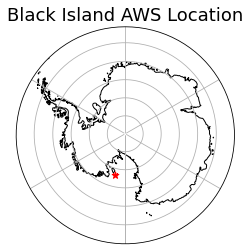

In [4]:
#Make the plot into a circle:
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

#Plot of Antarctica:
fig=plt.figure(figsize=(18,18))
ax=fig.add_subplot(142,projection=ccrs.SouthPolarStereo())
ax.coastlines()
ax.set_extent([-180,180,-90,-60],ccrs.PlateCarree())
ax.gridlines()
ax.set_title('Black Island AWS Location', fontsize=18)
ax.set_boundary(circle, transform=ax.transAxes)

#Adding a star to indicate where Black Island AWS is located
#The latitude and longitude used in this code were found in the original data set of the weather station data
ax.scatter([-166.1495],[-78.128],transform=ccrs.PlateCarree(),color='red',marker='*',s=50,zorder=5)

# Incorporating units back into the dataset

Currently, our data doesn't have any units attributed to it. Based on the orignial file we imported that contained the data, we know what the units are supposed to be for the data. Metpy can be used to include units back to our data for each individual varible.

We can use .columns to remind ourselves of the column names and determine which variables need units attacked to them. I decided to add units to all of the column varaibles except for Day and Time since day has no units and time is listed in minutes and hours.

In [5]:
df.columns

Index(['Day', 'Time', 'Temp', 'Pres', 'Speed', 'Dir', 'Gust', 'Peak', 'Min',
       'Max', 'RH', 'DewPt'],
      dtype='object')

In [6]:
#Attaching units to each individual column value
Pres=df['Pres'].values*units.hPa
Temp=df['Temp'].values*units.degC
Speed=df['Speed'].values*units.knots
Dir=df['Dir'].values*units.degrees
DewPt=df['DewPt'].values*units.degC
Gust=df['Gust'].values*units.knots
Peak=df['Peak'].values*units.knots
Max=df['Max'].values*units.knots
Min=df['Min'].values*units.knots
RH=df['RH'].values*units.percent
DewPt=df['DewPt'].values*units.degC

Now that the data variables have units attributed to them, there are a lot of other meteorological factors to investigate as well. Metpy has many functions that will compute the mathmatical equations needed to compute different meteorological values that scientists could use to investigate the given weather station data. If you tried to run these commands before adding units, the answer would come back to you as "dimentionless" which is not very insightful when conducting scientific research.

In [7]:
#This will give us the potential temperature and it's associated units
poten_T = mpcalc.potential_temperature(Pres[0], Temp[0])
poten_T

264.087904137191 <Unit('kelvin')>

In [8]:
#This will give us the saturation vapor pressure and it's associated units
svp = mpcalc.saturation_vapor_pressure(Temp[0])
svp

223.79932027742169 <Unit('pascal')>

The units for these two values are not units that were inputted as one of the column varaible units. However, based on the equations used in these functions and the units that were manually added to the column variables, metpy can associate the correct unit to the meteorological component being calculated by the function.

# Visualizing the data associated with the high wind event in question

The high wind event I want to look at in this project only happened at the very beginning of the month, so we can remove the data from the days of September 5-30.

In [9]:
#The high wind event only happened at the very beginning of the month, so we can remove the data from the days of Sept 5-30
df=df[(df['Day']>=1.0) & (df['Day']<=4.0)]
df

Day  Time  Temp   Pres  Speed  Dir  Gust  Peak   Min   Max    RH  DewPt
0      1     0 -13.1  947.5   66.3  174  78.8  78.8  51.7  78.8  87.0  -14.8
1      1    10 -13.2  947.9   67.7  177  84.4  84.4  48.9  84.4  87.0  -14.9
2      1    20 -13.1  947.3   69.7  171  79.8  79.8  43.6  79.8  87.0  -14.8
3      1    30 -13.1  948.5   61.5  172  73.0  73.0  53.2  73.0  87.0  -14.8
4      1    40 -13.2  948.8   62.0  168  69.5  69.5  48.1  69.5  87.0  -14.9
..   ...   ...   ...    ...    ...  ...   ...   ...   ...   ...   ...    ...
570    4  2310 -13.6  963.8    3.0  227   NaN   3.9   0.0   3.9  86.0  -15.4
571    4  2320 -13.7  963.7    3.1  227   NaN   3.9   1.5   3.9  86.0  -15.5
572    4  2330 -13.7  963.6    2.6  228   NaN   3.6   1.7   3.6  86.0  -15.5
573    4  2340 -13.7  963.5    2.3  227   NaN   3.9   1.5   3.9  86.0  -15.5
574    4  2350 -13.6  963.4    0.4  227   NaN   3.3   0.0   3.3  86.0  -15.4

[575 rows x 12 columns]

Let's check to see what kind of values are in our dataset to make sure they aren't strings. We need them to be able to be used in graphical analysis. We can do this by typing df.info()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575 entries, 0 to 574
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Day     575 non-null    int64  
 1   Time    575 non-null    int64  
 2   Temp    575 non-null    float64
 3   Pres    575 non-null    float64
 4   Speed   575 non-null    float64
 5   Dir     575 non-null    int64  
 6   Gust    347 non-null    float64
 7   Peak    575 non-null    float64
 8   Min     575 non-null    float64
 9   Max     575 non-null    float64
 10  RH      575 non-null    float64
 11  DewPt   575 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 58.4 KB


Now that we have the section of the data set that's applicable to the high wind event, we can start analyzing some of the data. First, let's make sure we don't have any data points that are outliers by plotting some of our variables in very simple plots.

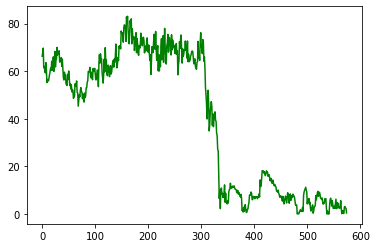

In [11]:
plt.plot(df['Speed'], color = 'green')

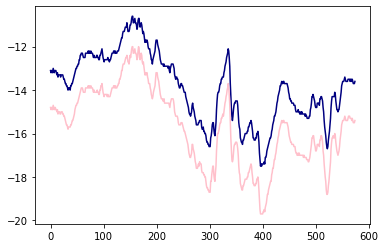

In [12]:
plt.plot(df['Temp'], color = 'navy')
plt.plot(df['DewPt'], color = 'pink')

The plots for station wind speed, temperature, and dewpoint plots all don't appear to have any outliers, so we can leave the data as is.

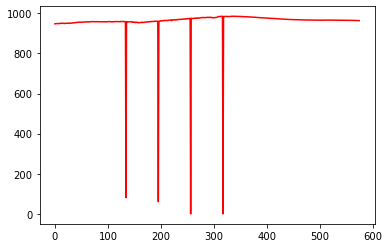

In [13]:
plt.plot(df['Pres'], color = 'red')

From looking at this basic plot, we can see that there are some data points that are obvious outliers. By getting rid of these points, we'll be able to do a much more meaningful analysis of the station pressure data. These outliers could be caused by a brief malfunction of the equiptment on the weather station. Since these weather stations are in Antarctica, the equitment is only able to be serviced during the field season, so it can only be visited once a year at most.

In [14]:
#use .where to get rid of outliers
df2 = df.where(df['Pres']>400)

Now, let's plot some of the key meteorological variables to see trends over the events. The varaibles I want to visualize are station pressure, wind speed, temperature, and dewpoint. Since station temperature and dewpoint are both measured in the same unit (Celcius) I'm going to include them on the same graph.

Text(0.5, 0.98, 'Black Island AWS Temperature over Time')

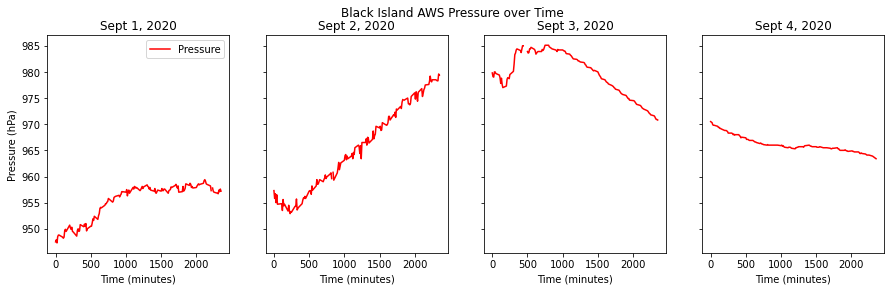

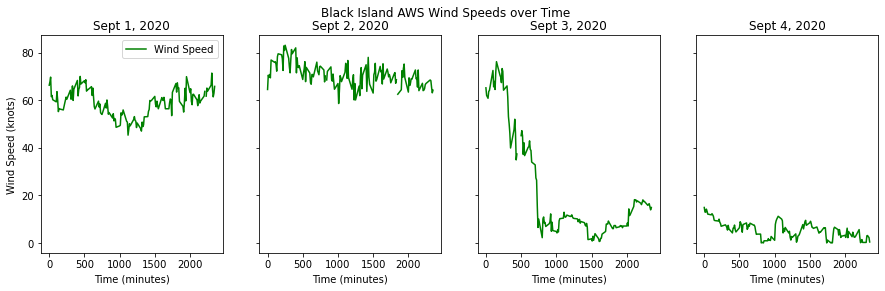

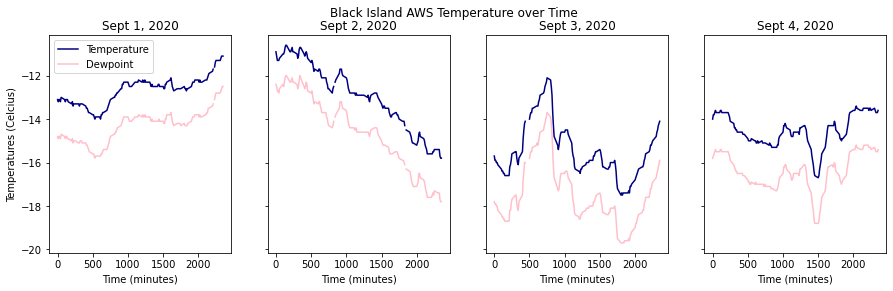

In [15]:
#Make a plot of all the pressures over the course of the 4 days
#include sharey=True so that the y-axis on all of the figures are identitcal so it's easier to visually comare the data
fig,ax=plt.subplots(1,4, figsize=(15,4), sharey=True)
axs=ax.flatten()

#Plot for Sept 1:
df_0901 = df2.where(df['Day']==1)
x = df_0901['Time']
y = df_0901['Pres']
axs[0].set_xlabel('Time (minutes)')
axs[0].set_ylabel('Pressure (hPa)')
axs[0].set_title('Sept 1, 2020')
axs[0].plot(x,y, color = 'red', label = "Pressure")
axs[0].legend()

#Plot for Sept 2:
df_0902 = df2.where(df['Day']==2)
x = df_0902['Time']
y = df_0902['Pres']
axs[1].set_xlabel('Time (minutes)')
axs[1].set_title('Sept 2, 2020')
axs[1].plot(x,y, color = 'red')
axs[1].legend
plt.suptitle('Station Pressure over Time')

#Plot for Sept 3:
df_0903 = df2.where(df['Day']==3)
x = df_0903['Time']
y = df_0903['Pres']
axs[2].set_xlabel('Time (minutes)')
axs[2].set_title('Sept 3, 2020')
axs[2].plot(x,y, color = 'red')
axs[2].legend
plt.suptitle('Station Pressure over Time')

#Plot for Sept 4:
df_0904 = df2.where(df['Day']==4)
x = df_0904['Time']
y = df_0904['Pres']
axs[3].set_xlabel('Time (minutes)')
axs[3].set_title('Sept 4, 2020')
axs[3].plot(x,y, color = 'red')
axs[3].legend
plt.suptitle('Black Island AWS Pressure over Time')



#Make a plot of all the wind speeds over the course of the 4 days
#include sharey=True so that the y-axis on all of the figures are identitcal so it's easier to visually comare the data
fig,ax2=plt.subplots(1,4, figsize=(15,4), sharey=True)
axs2=ax2.flatten()

#Plot for Sept 1:
x = df_0901['Time']
y = df_0901['Speed']
axs2[0].set_xlabel('Time (minutes)')
axs2[0].set_ylabel('Wind Speed (knots)')
axs2[0].set_title('Sept 1, 2020')
axs2[0].plot(x,y, color = 'green',label='Wind Speed')
axs2[0].legend()

#Plot for Sept 2:
x = df_0902['Time']
y = df_0902['Speed']
axs2[1].set_xlabel('Time (minutes)')
axs2[1].set_title('Sept 2, 2020')
axs2[1].plot(x,y, color = 'green')

#Plot for Sept 3:
x = df_0903['Time']
y = df_0903['Speed']
axs2[2].set_xlabel('Time (minutes)')
axs2[2].set_title('Sept 3, 2020')
axs2[2].plot(x,y, color = 'green')

#Plot for Sept 4:
x = df_0904['Time']
y = df_0904['Speed']
axs2[3].set_xlabel('Time (minutes)')
axs2[3].set_title('Sept 4, 2020')
axs2[3].plot(x,y, color = 'green')

#Put a title for all the plots
plt.suptitle('Black Island AWS Wind Speeds over Time')



#Make a plot of all the dewpoints and temperatures over the course of the 4 days
#include sharey=True so that the y-axis on all of the figures are identitcal so it's easier to visually comare the data
fig,ax3=plt.subplots(1,4, figsize=(15,4), sharey=True)
axs3=ax3.flatten()

#Plot for Sept 1:
x = df_0901['Time']
y1 = df_0901['Temp']
y2 = df_0901['DewPt']
axs3[0].set_ylabel('Temperatures (Celcius)')
axs3[0].set_xlabel('Time (minutes)')
axs3[0].set_title('Sept 1, 2020')
axs3[0].plot(x,y1, color = 'navy',label='Temperature')
axs3[0].plot(x,y2, color = 'pink', label = 'Dewpoint')
axs3[0].legend()

#Plot for Sept 2:
x = df_0902['Time']
y1 = df_0902['Temp']
y2 = df_0902['DewPt']
axs3[1].set_xlabel('Time (minutes)')
axs3[1].set_title('Sept 2, 2020')
axs3[1].plot(x,y1, color = 'navy')
axs3[1].plot(x,y2, color = 'pink')

#Plot for Sept 3:
x = df_0903['Time']
y1 = df_0903['Temp']
y2 = df_0903['DewPt']
axs3[2].set_xlabel('Time (minutes)')
axs3[2].set_title('Sept 3, 2020')
axs3[2].plot(x,y1, color = 'navy')
axs3[2].plot(x,y2, color = 'pink')

#Plot for Sept 4:
x = df_0904['Time']
y1 = df_0904['Temp']
y2 = df_0904['DewPt']
axs3[3].set_xlabel('Time (minutes)')
axs3[3].set_title('Sept 4, 2020')
axs3[3].plot(x,y1, color = 'navy')
axs3[3].plot(x,y2, color = 'pink')

#Put a title for all the plots
plt.suptitle('Black Island AWS Temperature over Time')

##### Brief analysis based on these plots:
- Pressure is at it's lowest when the wind is the highest.
- When the pressure starts to increase, the wind speeds slow down.
- As the wind speeds return to a more normal speed, the pressure starts to level out.
- There's a brief spike in temperature and dewpoint when the wind speed decreases.
- the temperature/dewpoint both decrease drastically during the exact time frame that the pressure level at the station is increasing drastically.
- The distance between the lines for temperature and dewpoint stays relatively consistent through the 4 days of the event, meaning that the humidity of the region is also very consistent.